<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1">Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2">Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1">Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2">Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3">Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4">Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1">In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2">Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5">Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1">In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#Clean-names-of-the-countries" data-toc-modified-id="Clean-names-of-the-countries-5.0.0.2">Clean names of the countries</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.3">If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.4">After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.5">In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6">Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2">Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3">Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7">Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1">In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#We-need-to-standarize-the-variables." data-toc-modified-id="We-need-to-standarize-the-variables.-7.0.0.2">We need to standarize the variables.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-K-Nearest-Neighbors." data-toc-modified-id="Our-second-algorithm-is-is-K-Nearest-Neighbors.-7.0.0.3">Our second algorithm is is K-Nearest Neighbors.</a></span></li><li><span><a href="#We'll-create-another-K-Nearest-Neighbors-model-with-k=5." data-toc-modified-id="We'll-create-another-K-Nearest-Neighbors-model-with-k=5.-7.0.0.4">We'll create another K-Nearest Neighbors model with k=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8">Bonus Challenge - Feature Scaling</a></span></li><li><span><a href="#Lab-DAY-4---Tree-models-and-features-selection" data-toc-modified-id="Lab-DAY-4---Tree-models-and-features-selection-9">Lab DAY 4 - Tree models and features selection</a></span><ul class="toc-item"><li><span><a href="#Implement-tree-model-for-classification" data-toc-modified-id="Implement-tree-model-for-classification-9.1">Implement tree model for classification</a></span></li></ul></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Supervise- Classification

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
web = pd.read_csv("../data/website.csv")

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
web.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


Goal:
**to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites**

This data set provides us with features for a particular site and if they are malicious or not.

We want to predict the last column: "Type".

The labels for this column are: 1 for malicious and 0 for bening/not malicious.

In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

We can see some features that need to be cleaned. 

There is one columns with missing values.

The majority of the variables are categorical ordinal.

Some others are cateogrical.

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [6]:
web.corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


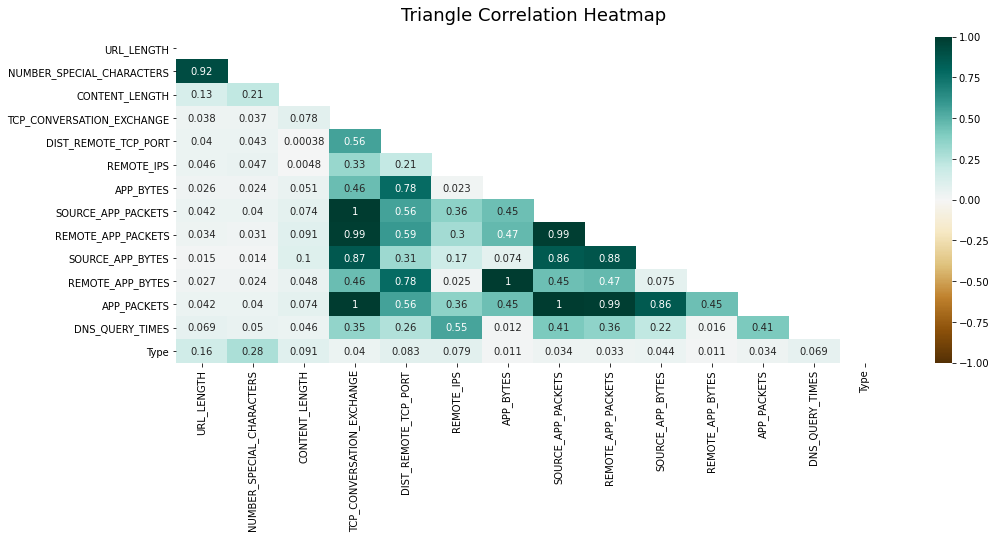

In [7]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(web.corr().abs(), dtype=bool))
heatmap = sns.heatmap(web.corr().abs(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

We are looking at independent variables and we can see there are several highly correlated between them. Those are giving us the same information so we will have to remove some.

- tcp_conversation_exchange is higlhy correlated with 4 features
- number of special characters with url lenght
- source_app_packets is also highly correlated with 3 variables
- remote_app_bytes

Is better to drop the columns that have less correlation with our dependent varaible.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [8]:
web2 = web.copy()

In [9]:
web2.drop(columns=["URL_LENGTH","APP_BYTES","SOURCE_APP_PACKETS","REMOTE_APP_PACKETS","TCP_CONVERSATION_EXCHANGE"], inplace= True)

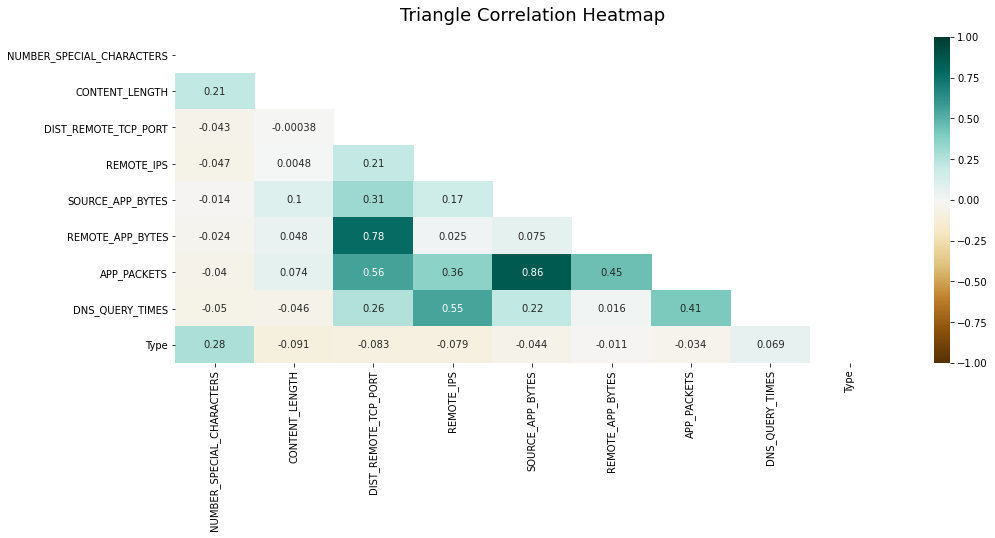

In [10]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(web2.corr(), dtype=bool))
heatmap = sns.heatmap(web2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [11]:
web2.isna().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

##### Content Lenght

In [12]:
web2.shape[0]

1781

In [13]:
web2["CONTENT_LENGTH"].isna().sum()

812

In [14]:
print("The proportion of missing values in the column CONTENT_LENGTH is:")
web2["CONTENT_LENGTH"].isna().sum() / web2.shape[0]

The proportion of missing values in the column CONTENT_LENGTH is:


0.45592363840539024

We will drop this column because it has a higher too many missing values

In [15]:
web2.drop("CONTENT_LENGTH", inplace=True, axis=1)

##### Server and DNS_Query_times

For those columns, as there are just 1 missing values we will examine what are those. Depending how maybe we can just drop the rows.


We are gonna look at the row were server has a missing value.

In [16]:
web2.loc[web2["SERVER"].isnull()]

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,11,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,2,4,246,1026,15,0.0,0


In [17]:
web2.drop(web2.loc[web2["SERVER"].isnull()].index[0], axis=0, inplace=True)

We will drop now the row for the other variable. I will use now, dropna().

In [18]:
web2.loc[web2["DNS_QUERY_TIMES"].isnull()]

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1659,B0_772,15,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,2,2,416,276,4,NaN,0


In [19]:
web2.loc[web2["DNS_QUERY_TIMES"].isnull()].index[0]

1659

In [20]:
web2.dropna(axis = 0, how ='any',inplace=True) 

In [21]:
#I see already that the catergorical variables have null values as well
web2.loc[web2.isnull().sum()]

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [22]:
web2.isnull().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [23]:
web2['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

#### Clean names of the countries

In [24]:
web2['WHOIS_COUNTRY'] = web2['WHOIS_COUNTRY'].str.upper()

In [25]:
web2['WHOIS_COUNTRY'].unique()

array(['NONE', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', "[U'GB'; U'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SI',
       'IL', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES',
       'BR', 'KR', 'HK', 'UA', 'CH', 'UNITED KINGDOM', 'BS', 'PK', 'IT',
       'CYPRUS', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [26]:
web2['WHOIS_COUNTRY'].replace(["UNITED KINGDOM","[U'GB'; U'UK']","GB"],"UK", inplace=True)

In [27]:
web2['WHOIS_COUNTRY'].replace("CYPRUS","CY", inplace=True)

In [28]:
web2['WHOIS_COUNTRY'].unique()

array(['NONE', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [29]:
web2['WHOIS_COUNTRY'].value_counts().values

array([1105,  306,   83,   63,   35,   35,   21,   11,   10,   10,    9,
          9,    6,    6,    6,    5,    4,    4,    4,    4,    3,    3,
          3,    3,    3,    3,    2,    2,    2,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1])

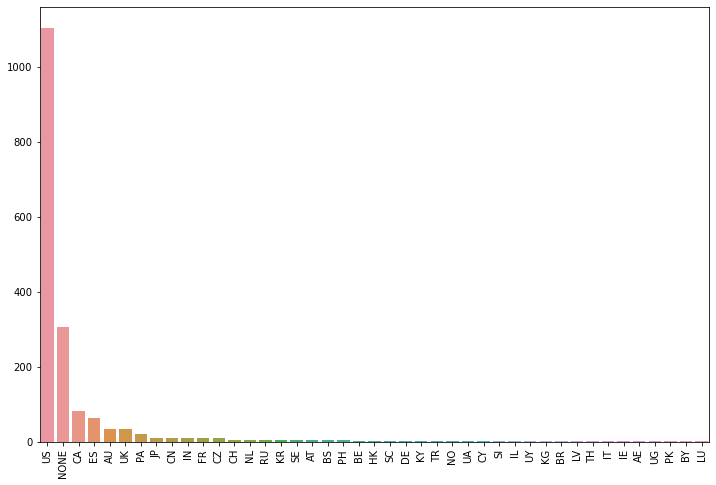

In [30]:
fig, ax = plt.subplots(1,1,figsize = (12,8))
sns.barplot(x = web2['WHOIS_COUNTRY'].value_counts().index, y = web2['WHOIS_COUNTRY'].value_counts().values)
plt.xticks(rotation=90);

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

We will select the top 10 and put the rest in others, but also the None Values.

In [31]:
web2['WHOIS_COUNTRY'].value_counts(ascending= False)

US      1105
NONE     306
CA        83
ES        63
AU        35
UK        35
PA        21
JP        11
CN        10
IN        10
FR         9
CZ         9
CH         6
NL         6
RU         6
KR         5
SE         4
AT         4
BS         4
PH         4
BE         3
HK         3
SC         3
DE         3
KY         3
TR         3
NO         2
UA         2
CY         2
SI         2
IL         2
UY         2
KG         2
BR         2
LV         1
TH         1
IT         1
IE         1
AE         1
UG         1
PK         1
BY         1
LU         1
Name: WHOIS_COUNTRY, dtype: int64

In [32]:
web2['WHOIS_COUNTRY'].value_counts(ascending= False).index[:11]

Index(['US', 'NONE', 'CA', 'ES', 'AU', 'UK', 'PA', 'JP', 'CN', 'IN', 'FR'], dtype='object')

In [33]:
indexes_to_others =list(web2['WHOIS_COUNTRY'].value_counts(ascending= False)[11:].index) 
indexes_to_others.append(web2['WHOIS_COUNTRY'].value_counts(ascending= False).index[1])
indexes_to_others

['CZ',
 'CH',
 'NL',
 'RU',
 'KR',
 'SE',
 'AT',
 'BS',
 'PH',
 'BE',
 'HK',
 'SC',
 'DE',
 'KY',
 'TR',
 'NO',
 'UA',
 'CY',
 'SI',
 'IL',
 'UY',
 'KG',
 'BR',
 'LV',
 'TH',
 'IT',
 'IE',
 'AE',
 'UG',
 'PK',
 'BY',
 'LU',
 'NONE']

In [34]:
#df['column'] = np.where(df['column']condition,ouput for condition,else output)

web2['WHOIS_COUNTRY'] = np.where(web2['WHOIS_COUNTRY'].isin(indexes_to_others)
                               ,'Other',web2['WHOIS_COUNTRY'])

In [35]:
 web2['WHOIS_COUNTRY'].unique()

array(['Other', 'US', 'UK', 'AU', 'CA', 'PA', 'IN', 'FR', 'JP', 'CN',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [36]:
 web2.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace = True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [37]:
web2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 6   REMOTE_IPS                 1779 non-null   int64  
 7   SOURCE_APP_BYTES           1779 non-null   int64  
 8   REMOTE_APP_BYTES           1779 non-null   int64  
 9   APP_PACKETS                1779 non-null   int64  
 10  DNS_QUERY_TIMES            1779 non-null   float64
 11  Type                       1779 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 245.2+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [38]:
web2.drop("URL", axis=1, inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [39]:
web2["CHARSET"].unique()


array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [40]:
web2["SERVER"].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

We should filter the strings to find the server...


![Think Hard](../images/think-hard.jpg)

In [41]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [42]:
web2['SERVER'] = np.where(web2['SERVER'].str.contains("Apache")
                               ,'Apache',web2['SERVER'])

In [43]:
web2['SERVER'] = np.where(web2['SERVER'].str.contains("nginx")
                               ,"nginx",web2['SERVER'])

In [44]:
web2['SERVER'] = np.where(web2['SERVER'].str.contains("Microsoft")
                               ,"Microsoft",web2['SERVER'])

In [45]:
main_servers_list = ["Microsoft","Apache","nginx"]

In [46]:
web2['SERVER'] = np.where(web2['SERVER'].isin(main_servers_list),web2['SERVER'],'Other')

In [47]:
web2['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [48]:
web_dummies = pd.get_dummies(web2,drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [49]:
web_dummies.head()

,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859-1,CHARSET_None,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,0,2,1153,832,9,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6,7,4,1265,1230,17,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,6,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6,22,3,18784,4380,39,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6,2,5,129889,4586,61,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
web_dummies.columns

Index(['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'CHARSET_ISO-8859-1', 'CHARSET_None',
       'CHARSET_UTF-8', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_Microsoft', 'SERVER_Other', 'SERVER_nginx', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_FR',
       'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_Other',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US'],
      dtype='object')

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [51]:
from sklearn.model_selection import train_test_split

# we separate the independent and the dependent variables

y= web_dummies['Type']
X= web_dummies.drop('Type', axis=1)

In [52]:
##1. We split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#power transformer

#np.log tranformation or power transformer

model_log = LogisticRegression()
scaler = StandardScaler()

#### We need to standarize the variables.

In [54]:
#1. We fit the transformer with the X-train
scaler.fit(X_train)

StandardScaler()

In [55]:
#2. We transform the X variables with the fitted scaler

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [56]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [57]:
#1. We train the model
model_log.fit(X_train, y_train)


LogisticRegression()

In [58]:
#2. We make predictions
y_pred_train_lm = model_log.predict(X_train)
y_pred_test_lm  = model_log.predict(X_test)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [60]:
accuracy_score(y_test, y_pred_test_lm)

0.9213483146067416

In [61]:
accuracy_score(y_train, y_pred_train_lm)

0.9205903021784961

In [62]:
confusion_matrix(y_test, y_pred_test_lm)

array([[311,   4],
       [ 24,  17]])

In [63]:
confusion_matrix(y_train, y_pred_train_lm)

array([[1228,   20],
       [  93,   82]])

In [64]:
performance_lm = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_lm),
                                         precision_score(y_train, y_pred_train_lm),
                                         recall_score(y_train, y_pred_train_lm)],
                               'Test': [accuracy_score(y_test, y_pred_test_lm),
                                        precision_score(y_test, y_pred_test_lm),
                                        recall_score(y_test, y_pred_test_lm)]})

display(performance_lm)

,Error_metric,Train,Test
0,Accuracy,0.920590,0.921348
1,Precision,0.803922,0.809524
2,Recall,0.468571,0.414634


Plot of the confusion matrix, we input the model trained and the X and the Y_real.

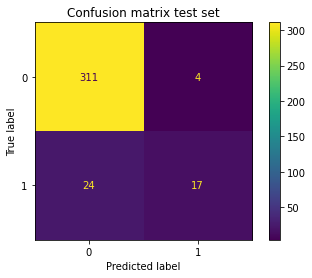

In [65]:
#plot_confusion_matrix(model_trained, X_test, y_test)  
plot_confusion_matrix(model_log,X_test, y_test)
plt.title("Confusion matrix test set");

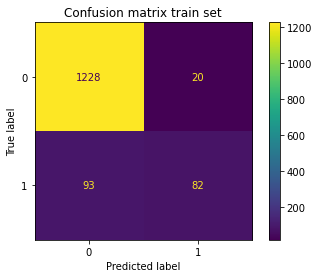

In [66]:
#plot_confusion_matrix(model_trained, X_test, y_test)  
plot_confusion_matrix(model_log,X_train, y_train)
plt.title("Confusion matrix train set");

What are your thoughts on the performance of the model? Write your conclusions below.

- We can see that the accurancy is similar for for train and test sets.

- Precision and Recall are similar, just a bit higher for the test.

- Precision is higher than Recall (for both), meaning that the model detects better non fraud than the fraud. That would make sense as there are more observations for non fraud than for fraud (classic unbalanced class). In the reality we would like to maximize the Reacall, as we are not intersted in getting a non fraud prediction while it is truly fraud (Minimize the FN, 20)

 Solution: Creating artifial data for the unbalanced class.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [69]:
#requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. 
#Euclidean distance is sensitive to magnitudes. 
#we hace already scalerd this data before

#1. Train de model
knn.fit(X_train,y_train)

#2. Predict the values for train and test

y_pred_train_knn= knn.predict(X_train)
y_pred_test_knn = knn.predict (X_test)

Print the error metrics and plot the confusion matric

In [70]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.962052,0.943820
1,Precision,0.866667,0.838710
2,Recall,0.817143,0.634146


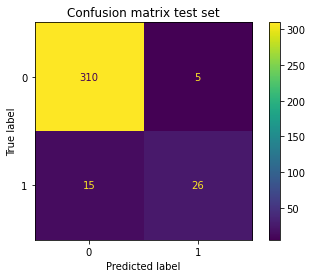

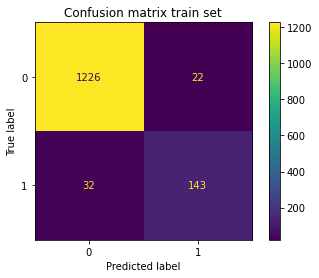

In [71]:
plot_confusion_matrix(knn,X_test, y_test)
plt.title("Confusion matrix test set")


plot_confusion_matrix(knn,X_train, y_train)
plt.title("Confusion matrix train set");

- We see now the model for the train set works better overall and detects well either positive and negative cases.

- For the test set it predicts worst the positive cases, the real fraudulent sites predictes as non fraudulent. Ideally we would like to minimize this term.

- It seems to be that the logistic regression model was working better on this case.

- Being the recall smaller in the test set, I would understand that for positive cases the model is too specific for the train test, and then is overfitting the predictions on the test set.



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [72]:
knn_2 = KNeighborsClassifier(n_neighbors=5)

#1. Train de model
knn_2.fit(X_train,y_train)

#2. Predict the values for train and test

y_pred_train_knn_2= knn_2.predict(X_train)
y_pred_test_knn_2 = knn_2.predict (X_test)

In [73]:
performance_knn_2 = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn_2),
                                         precision_score(y_train, y_pred_train_knn_2),
                                         recall_score(y_train, y_pred_train_knn_2)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn_2),
                                        precision_score(y_test, y_pred_test_knn_2),
                                        recall_score(y_test, y_pred_test_knn_2)]})

display(performance_knn_2)




SyntaxError: invalid syntax (<ipython-input-73-c9eade7c2c31>, line 12)

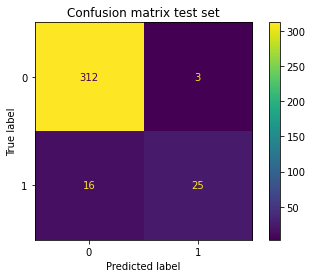

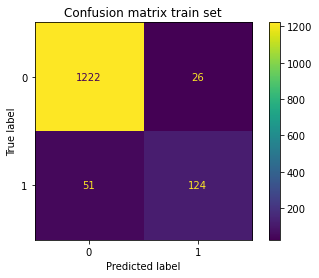

In [74]:
plot_confusion_matrix(knn_2,X_test, y_test)
plt.title("Confusion matrix test set")


plot_confusion_matrix(knn_2,X_train, y_train)
plt.title("Confusion matrix train set");

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

- The accurancy is similar

- The Recall, the metrics we are most interested in minimizing the eror has dropped in the train and more or less the same in the test.

- I would understand the model we did with k= 3 was better as the Recall on the test is the best

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
##1. We split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
robust_scaling = RobustScaler()
#1. Fit the scaler
robust_scaling.fit(X_train)

In [ ]:
#2. Trannsform data from train and test
X_train = robust_scaling.transform(X_train)
X_test = robust_scaling.transform(X_test)

In [ ]:
#3.New instance from the regression model
model_logm2 = LogisticRegression()

In [ ]:
# 4. Train the model
model_logm2.fit(X_train, y_train)

In [ ]:
# 5. Predict values
y_pred_train_logm2 = model_logm2.predict(X_train)
y_pred_test_logm2 = model_logm2.predict(X_test)


In [110]:
performance_logm2 = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_logm2),
                                         precision_score(y_train, y_pred_train_logm2),
                                         recall_score(y_train, y_pred_train_logm2)],
                               'Test': [accuracy_score(y_test, y_pred_test_logm2),
                                        precision_score(y_test, y_pred_test_logm2),
                                        recall_score(y_test, y_pred_test_logm2)]})

print("Logistic model using Standard Scaler")
display(performance_lm)
print("Logistic model using Robust Scaler")
display(performance_logm2)


Logistic model using Standard Scaler


,Error_metric,Train,Test
0,Accuracy,0.921293,0.929775
1,Precision,0.794393,0.807692
2,Recall,0.485714,0.512195


Logistic model using Robust Scaler


,Error_metric,Train,Test
0,Accuracy,0.921996,0.921348
1,Precision,0.780702,0.782609
2,Recall,0.508571,0.439024


I have already used in the previous model a StandardScaler,even tought I did not check for outliers...
Overall using the Robutst scaler seems to reduce the performance of the model than with the StandardScaler.

# Lab DAY 4 - Tree models and features selection

## Implement tree model for classification

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [93]:
def model_performance_metric_classifier(y_train, y_pred_train, y_test, y_pred_test):
    """ Calculates and returns the performance score between 
        true and predicted values for classifier problems """



    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    

    
    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})


    return performance_df, df_train, df_test

In [75]:
y= web_dummies['Type']
X= web_dummies.drop('Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
X.shape

(1779, 28)

In [90]:
p,_,_ =model_performance_metric_classifier(y_train, y_pred_train, y_test, y_pred_test)

In [91]:
p

,Error_metric,Train,Test
0,Accuracy,0.911455,0.918539
1,Precision,0.980392,1.000000
2,Recall,0.285714,0.292683


Confusion matrix for the train set1
[[1247    1]
 [ 125   50]]


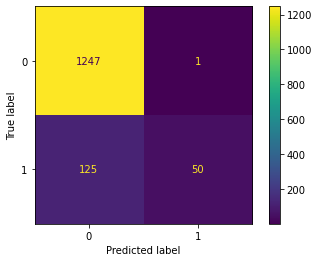



Confusion matrix for the test set1
[[315  29]
 [  0  12]]


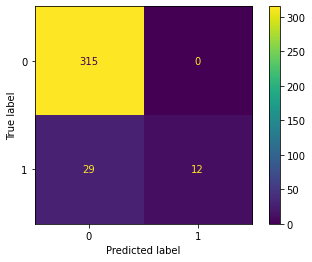

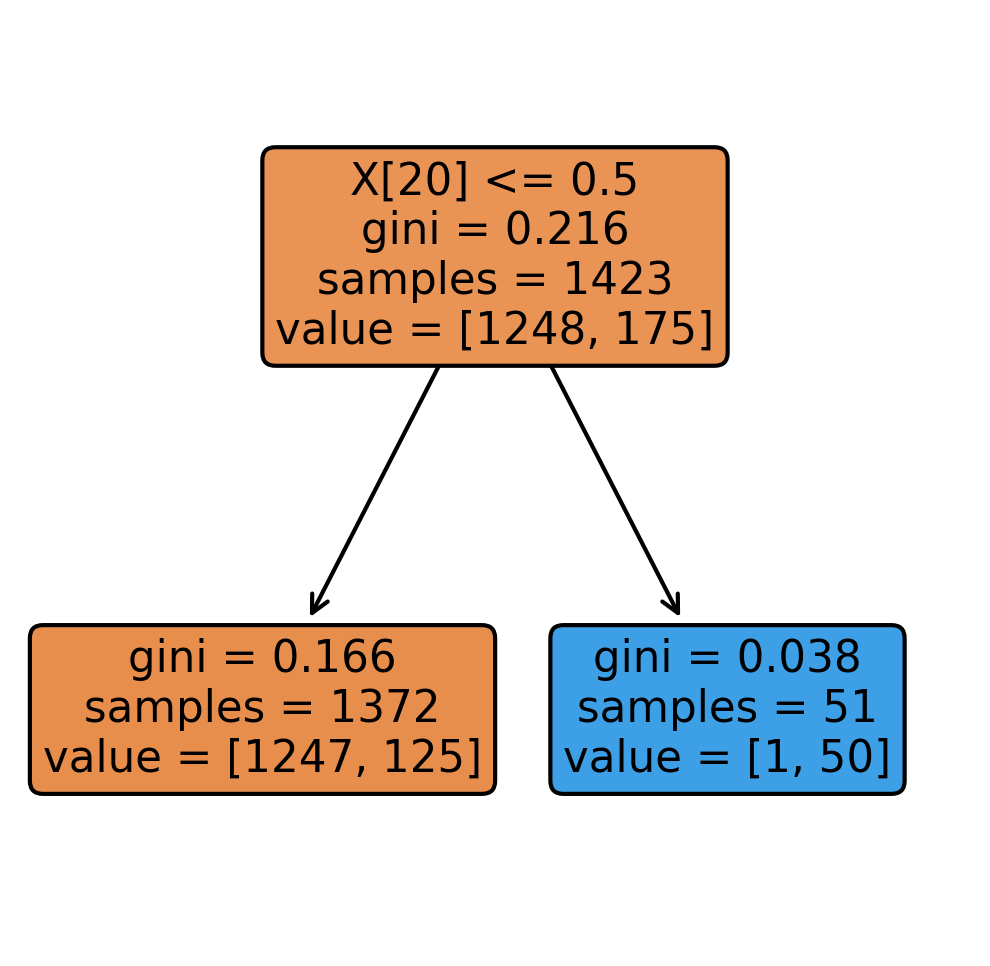

Confusion matrix for the train set3
[[1248    0]
 [ 125   50]]


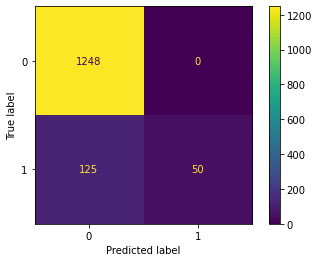



Confusion matrix for the test set3
[[315  29]
 [  0  12]]


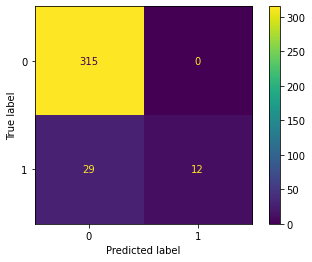

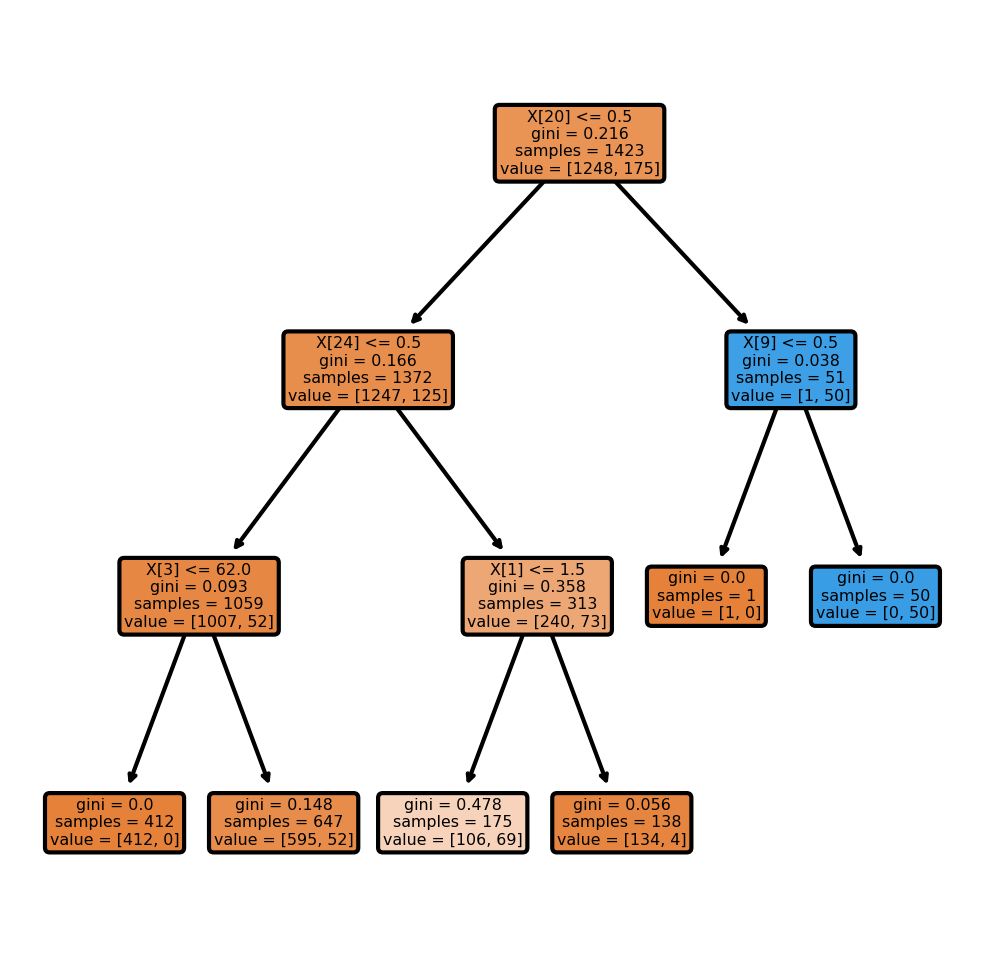

Confusion matrix for the train set5
[[1234   14]
 [  63  112]]


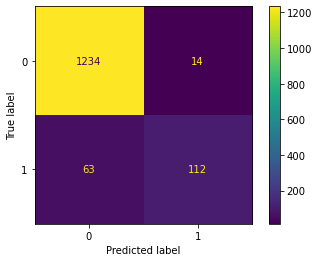



Confusion matrix for the test set5
[[314  20]
 [  1  21]]


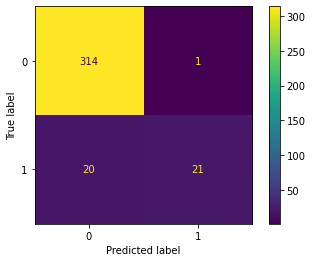

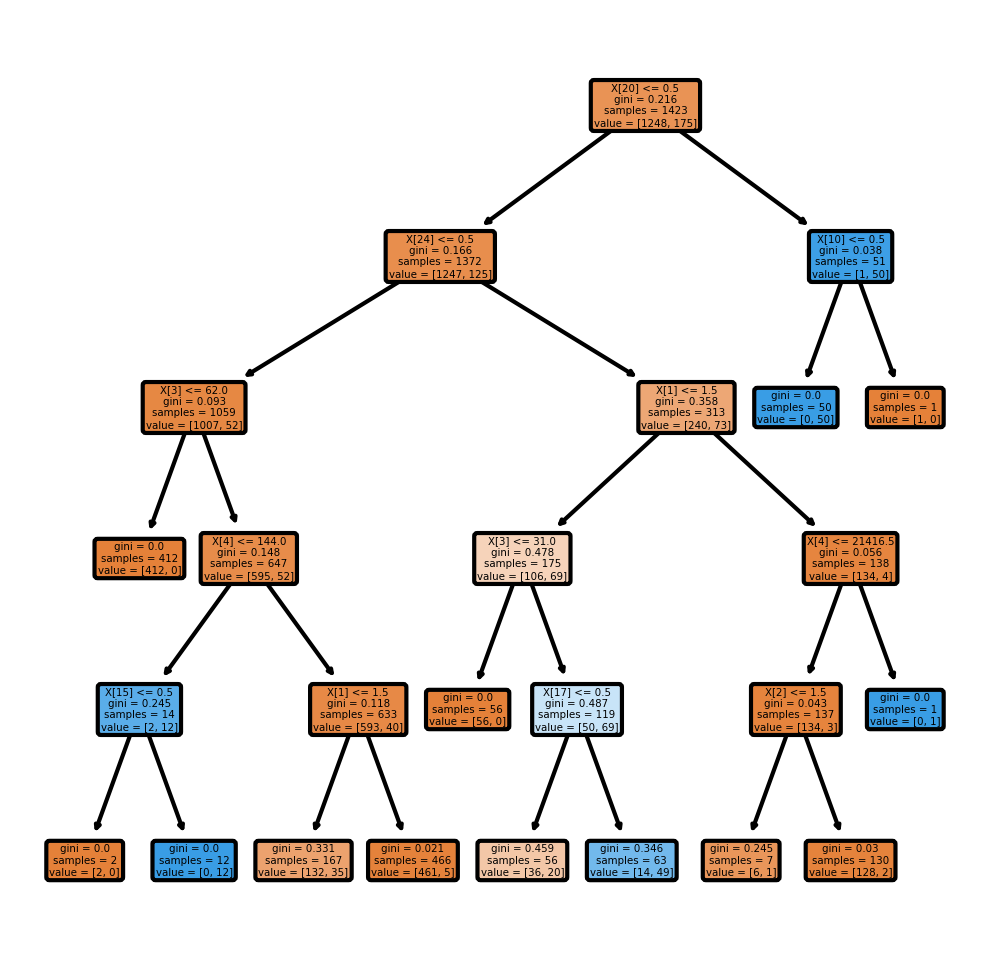

Confusion matrix for the train set8
[[1237   11]
 [  25  150]]


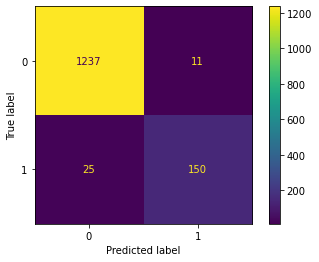



Confusion matrix for the test set8
[[300  17]
 [ 15  24]]


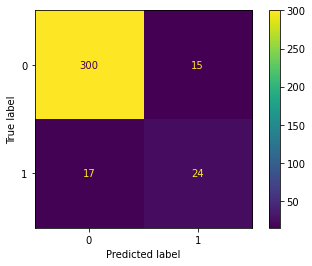

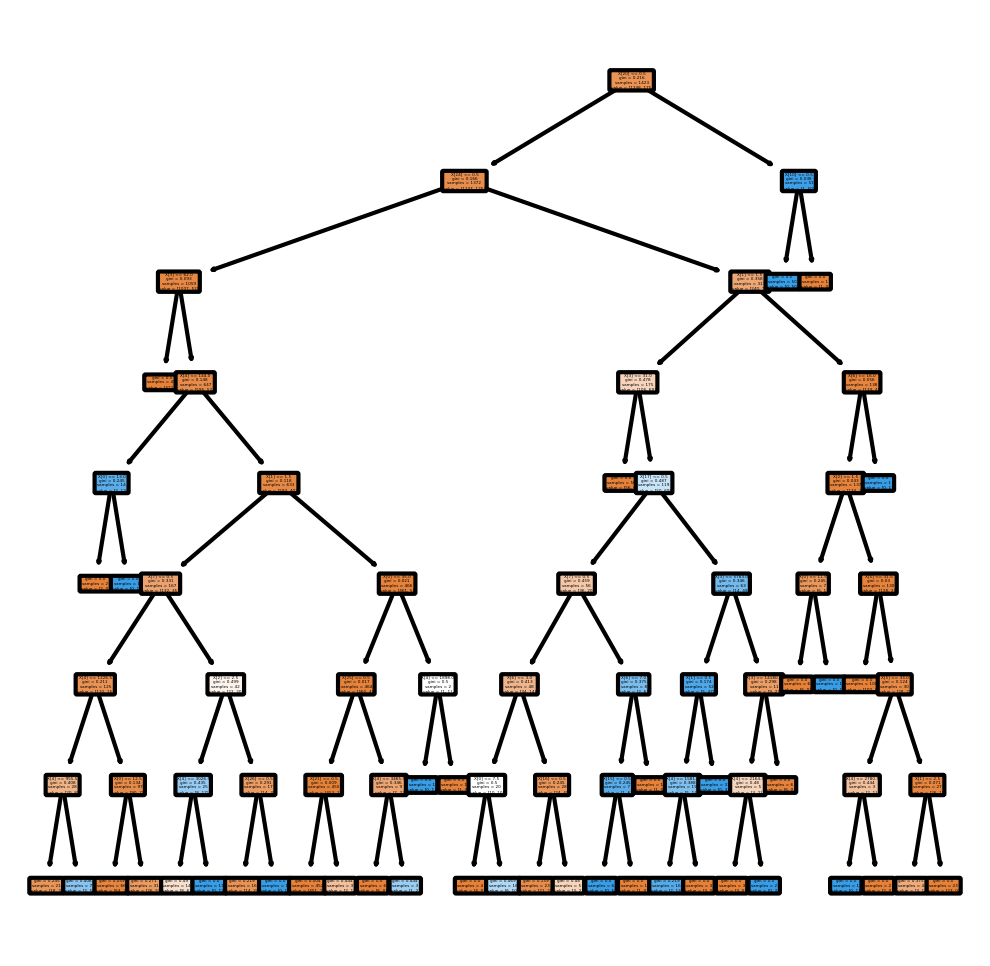

Confusion matrix for the train set10
[[1244    4]
 [  11  164]]


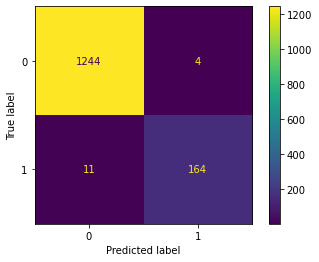



Confusion matrix for the test set10
[[297  14]
 [ 18  27]]


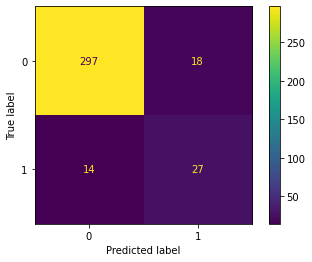

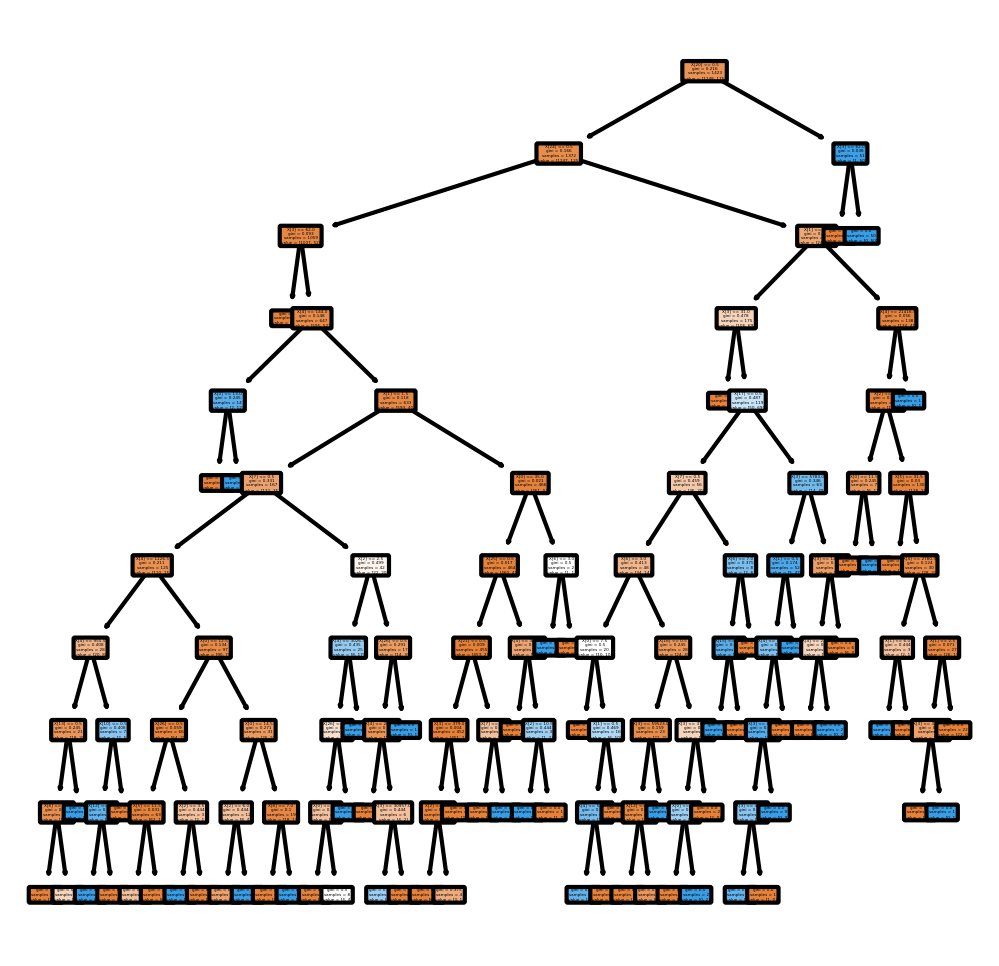

Confusion matrix for the train set15
[[1248    0]
 [   0  175]]


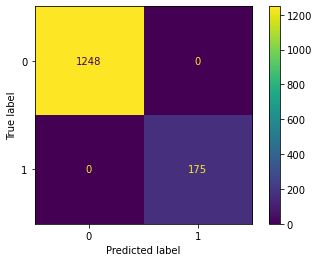



Confusion matrix for the test set15
[[297  14]
 [ 18  27]]


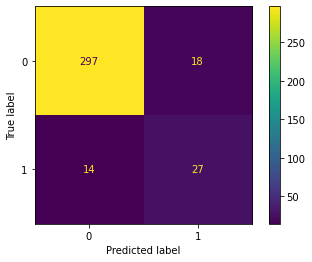

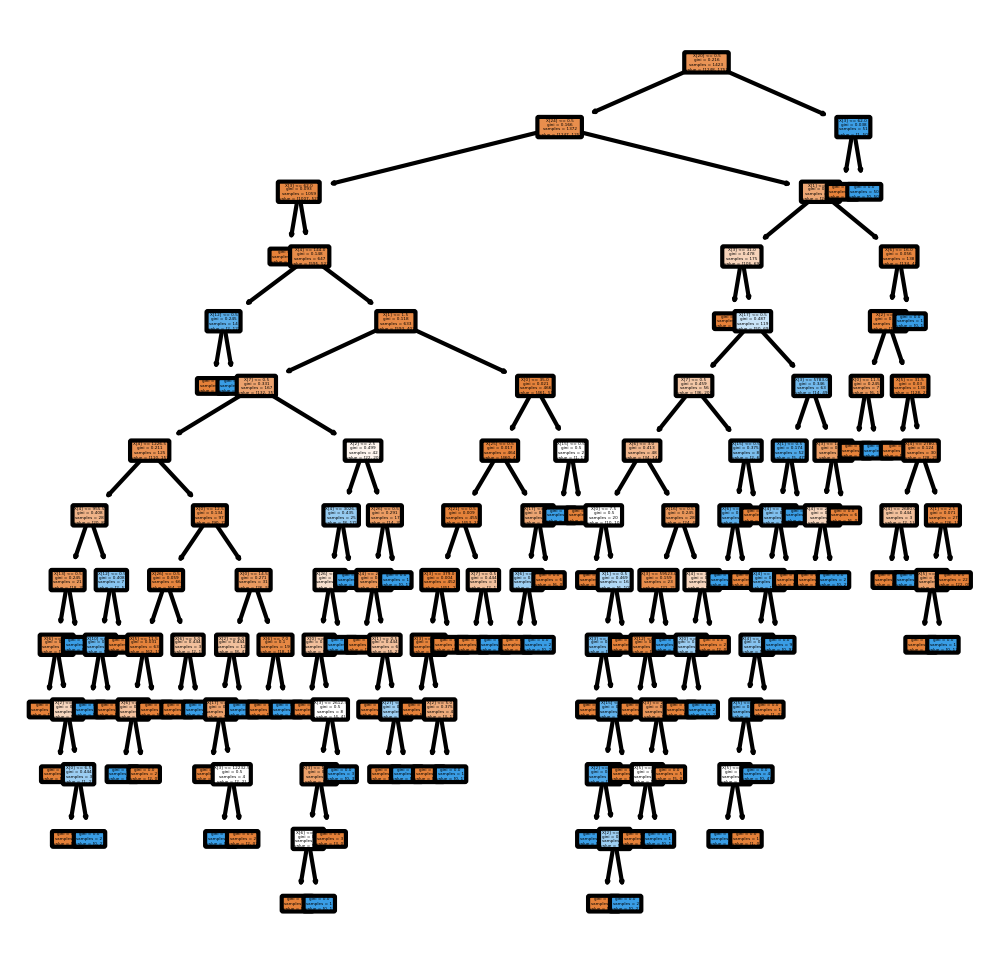

Confusion matrix for the train set20
[[1248    0]
 [   0  175]]


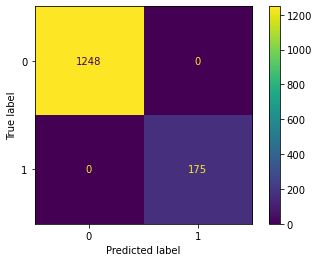



Confusion matrix for the test set20
[[296  14]
 [ 19  27]]


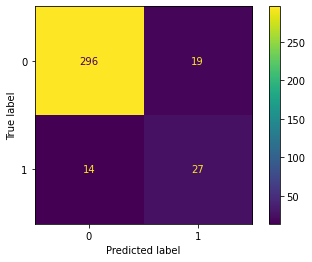

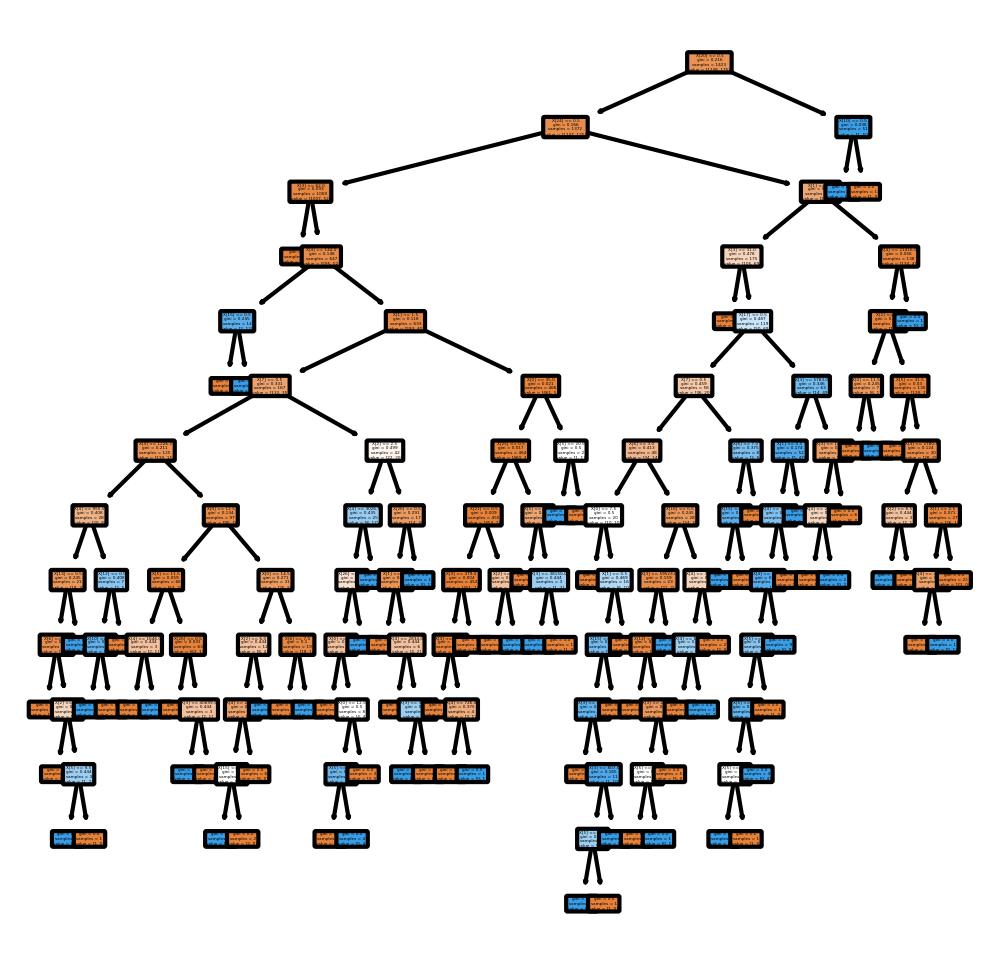

,i,Error metric,Train,Test
0,1,Accuracy,0.911455,0.918539
1,1,Precision,0.980392,1.000000
2,1,Recall,0.285714,0.292683
0,3,Accuracy,0.912157,0.918539
1,3,Precision,1.000000,1.000000
2,3,Recall,0.285714,0.292683
0,5,Accuracy,0.945889,0.941011
1,5,Precision,0.888889,0.954545
2,5,Recall,0.640000,0.512195
0,8,Accuracy,0.974701,0.910112


In [102]:
max_depth_list = [1,3,5,8,10,15,20]
full = pd.DataFrame()

dt_models = {'i': []}

for i in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    dt_models['i'] = [i, dt]
    
    y_pred_train = dt.predict(X_train)
    y_pred_test= dt.predict(X_test)

    performance_dt, _, _ = model_performance_metric_classifier(y_train, y_pred_train, y_test, y_pred_test)
    temp = pd.DataFrame({'i': [i]*3, 'Error metric': performance_dt['Error_metric'], 'Train': performance_dt['Train'],
                        'Test': performance_dt['Test']})
    full = pd.concat([full,temp], axis=0)



    print("Confusion matrix for the train set" + str(i))
    print(confusion_matrix(y_train,y_pred_train)) #real values and predicted values
    plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
    plt.show()


    print()
    print()

    print("Confusion matrix for the test set" + str(i) )
    print(confusion_matrix(y_test,y_pred_test).T)
    plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
    plt.show()
    
    from sklearn.tree import plot_tree
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

    plot_tree(dt,filled = True, rounded=True)
    plt.show() 

full

In [105]:
from sklearn.feature_selection import RFE
dt = DecisionTreeClassifier()

selector = RFE(dt, n_features_to_select= 10, step = 1, verbose = 1) 

selector.fit(X_train, y_train)


kept_features = selector.get_support(indices = True) 
#returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)


Final selected features: 


,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,SERVER_nginx,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_Other
0,10.0,5.0,1064.0,738.0,9.0,1.0,0.0,0.0
1,10.0,0.0,1754.0,1617.0,20.0,0.0,0.0,1.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,0.0,1960.0,1011.0,11.0,0.0,0.0,0.0
4,6.0,25.0,33677.0,4365.0,42.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1418,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,10.0,35.0,44203.0,5469.0,49.0,0.0,0.0,0.0
1420,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1421,13.0,1.0,24630.0,4114.0,43.0,1.0,0.0,0.0
